## Practical Work 3

We will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [6]:
from sklearn.metrics import r2_score

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

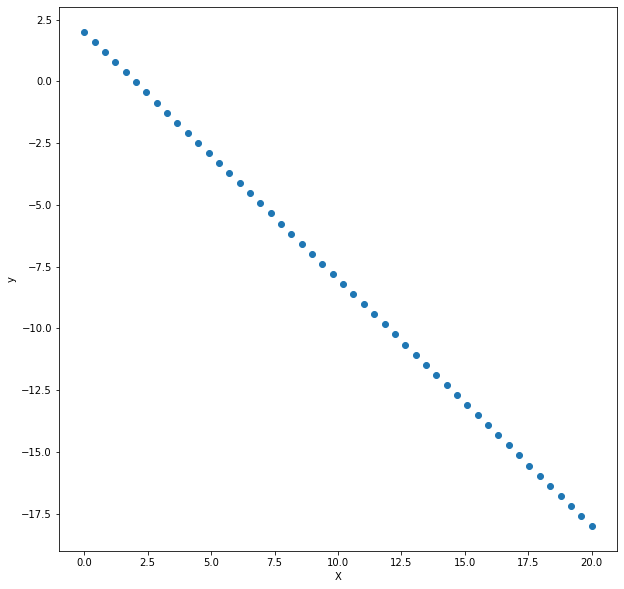

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [32]:
def plot_loss_epochs(losses, epochs, f_size):
  plt.figure(figsize=f_size)
  plt.plot(losses, epochs, marker='*')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title("plot loss vs epochs")
  plt.show()

def plot_loss_theta(losses, thetas, alpha, gamma, i):
  plt.figure(figsize=(10, 10))
  plt.plot(thetas, losses, marker='*')
  plt.xlabel(f'Theta {i}')
  plt.ylabel('Loss')
  plt.title(f"Learning Rate = {alpha}, Momentum = {gamma}")
  plt.show()

def plot_reg_lines(h_s, X, y):
  plt.figure(figsize=(10, 10))
  plt.scatter(X, y, marker='*')
  for i in range(len(h_s)):
    plt.plot(X, h_s[i], 'r')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title(f"All regression lines")
  plt.show()

def plot_all(cost_vals, thetas0, thetas1, alpha, gamma, h_s, X, y, f_size):
  plot_loss_epochs(np.arange(len(cost_vals)), cost_vals, f_size)
  plot_loss_theta(cost_vals, thetas0, alpha, gamma, 0)
  plot_loss_theta(cost_vals, thetas1, alpha, gamma, 1)
  plot_reg_lines(h_s, X, y)
  plot_reg_lines([h_s[-1]], X, y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [9]:
def gradient_descent(X, y, alpha, iterations):
  cost_vals = []
  h_s = []
  thetas0 = []
  thetas1 = []

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  i = 0
  grad = np.ones((2, 1))
  m = y.shape[0]

  while i < iterations and np.linalg.norm(grad, 2) > 0.001:
      print(f"****************** Iteration {i} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * X
      h_s.append(h_x)
      print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y
      j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
      print(f'Error Vector: \n{error}')
      print(f'\nj = {j}')
      cost_vals.append(j)
      
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / m
      d_theta_1 = np.sum(error * X) / m
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      print(f"Gradient Vector: \n{grad}")
      print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      theta_0 -= alpha * d_theta_0
      theta_1 -= alpha * d_theta_1
      print(f'theta_0_new : {theta_0}')
      print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

      # Convergence check
      if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.001:
        break

      i += 1
    
  return theta_0, theta_1, cost_vals, h_s, thetas0, thetas1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [29]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = gradient_descent(X, y, alpha= 0.0005, iterations= 300)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.004
theta_1_new : -0.05734693877

In [30]:
r2_score(y,h_s[-1])

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

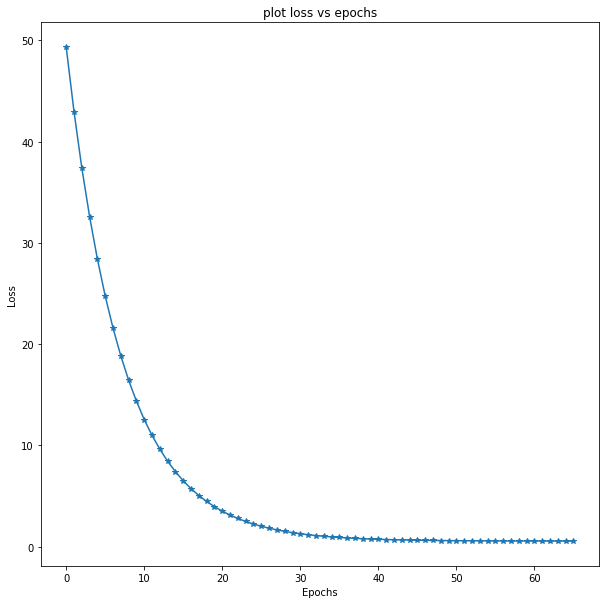

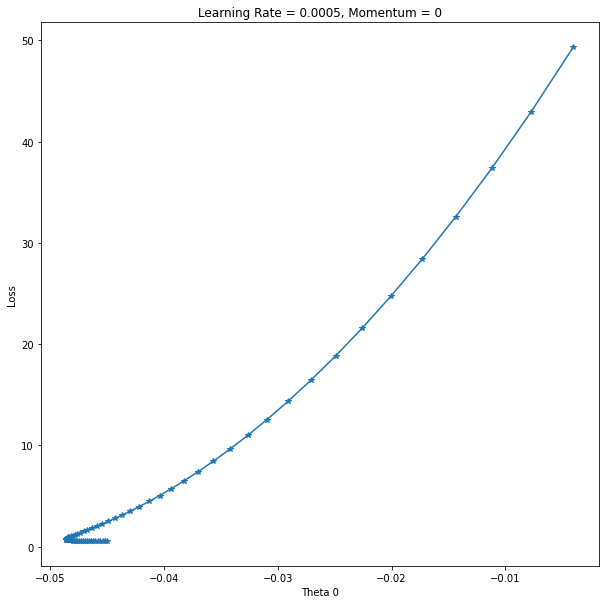

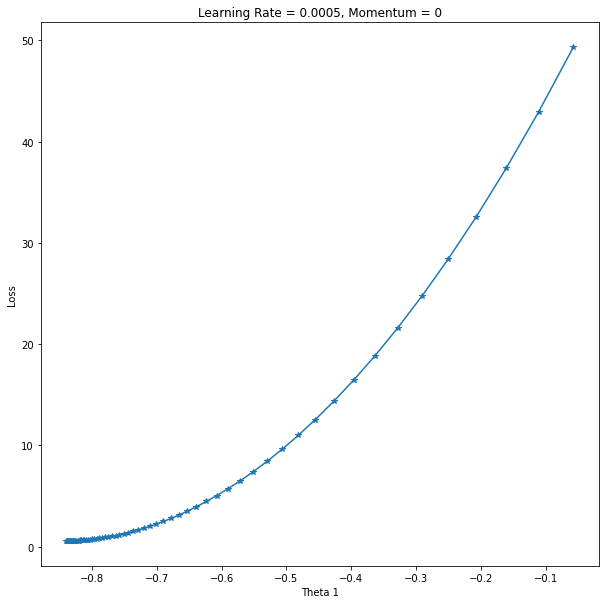

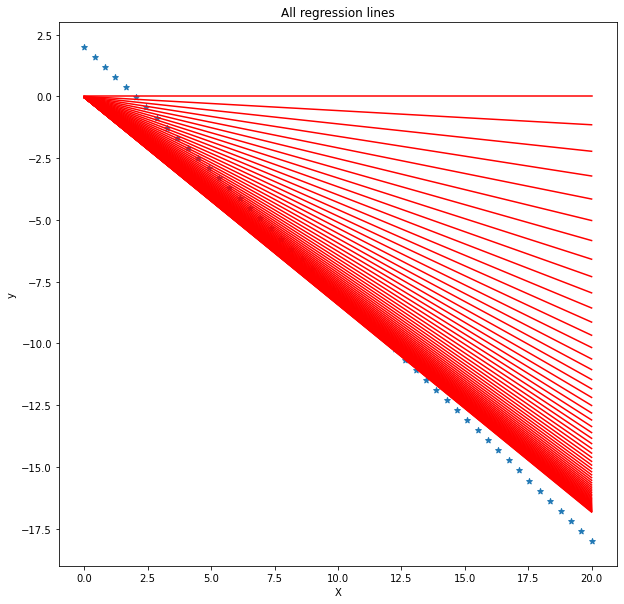

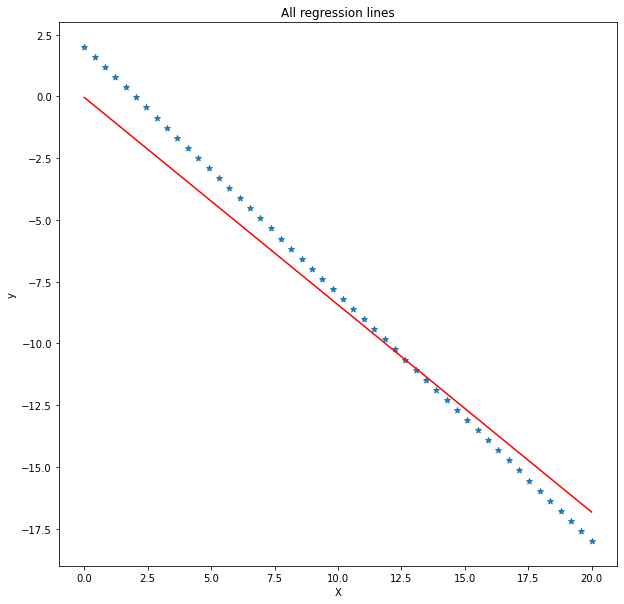

In [33]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, 0, h_s, X, y, (10,10))

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [27]:
def momentum_GD(X, y, alpha, momentum, iterations):
  cost_vals = []
  h_s = []
  thetas0 = []
  thetas1 = []

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  vt_0 = 0
  vt_1 = 0
  i = 0
  grad = np.ones((2, 1))
  m = y.shape[0]

  while i < iterations and np.linalg.norm(grad, 2) > 0.001:
      print(f"****************** Iteration {i} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * X
      h_s.append(h_x)
      print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y
      j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
      print(f'Error Vector: \n{error}')
      print(f'\nj = {j}')
      cost_vals.append(j)
      
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / m
      d_theta_1 = np.sum(error * X) / m
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      print(f"Gradient Vector: \n{grad}")
      print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      vt_0 = momentum * vt_0 + alpha * d_theta_0
      vt_1 = momentum * vt_1 + alpha * d_theta_1
      theta_0 -= vt_0
      theta_1 -= vt_1
      print(f'theta_0_new : {theta_0}')
      print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

      # Convergence check
      if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.001:
        break

      i += 1
    
  return theta_0, theta_1, cost_vals, h_s, thetas0, thetas1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [34]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = momentum_GD(X, y, alpha=0.0005, momentum=0.5, iterations=300)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.004
theta_1_new : -0.05734693877

In [35]:
r2_score(y,h_s[-1])

0.9687892837396442

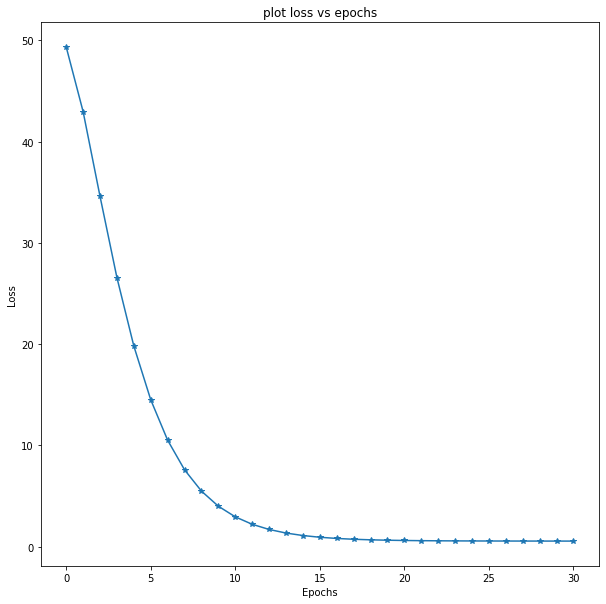

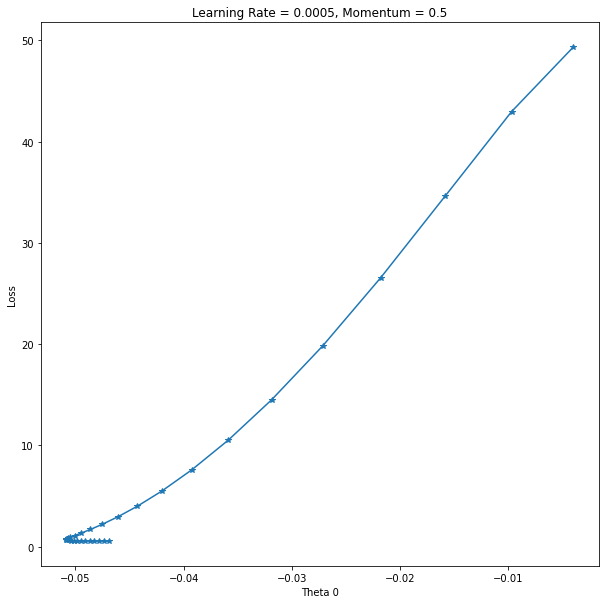

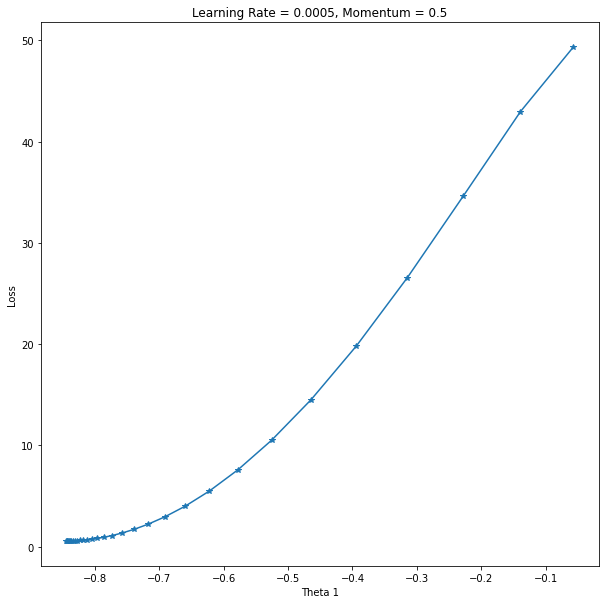

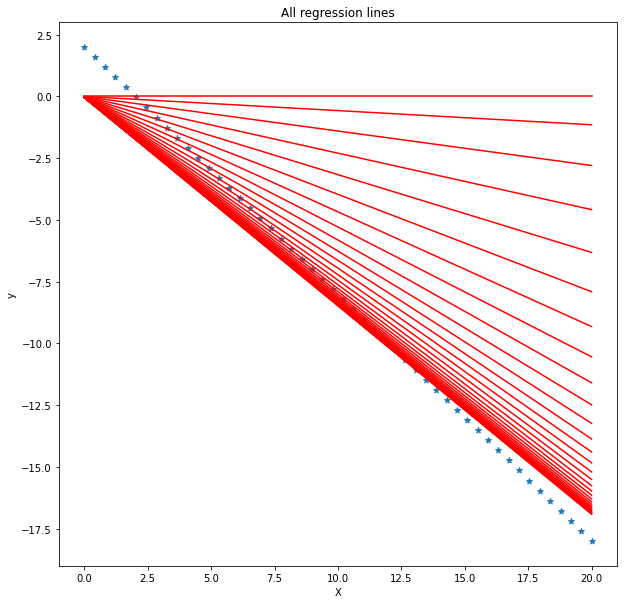

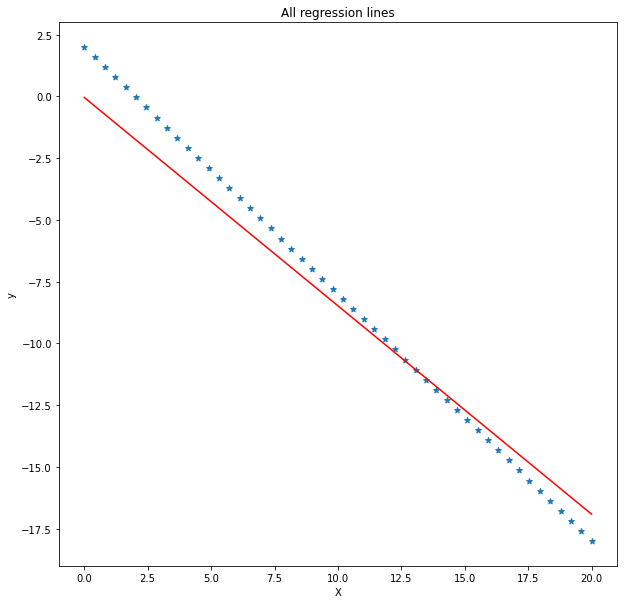

In [36]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, 0.5, h_s, X, y, (10,10))

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [37]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = momentum_GD(X, y, alpha=0.0005, momentum=0.9, iterations=300)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.004
theta_1_new : -0.05734693877

In [38]:
r2_score(y,h_s[-1])

0.973589591111118

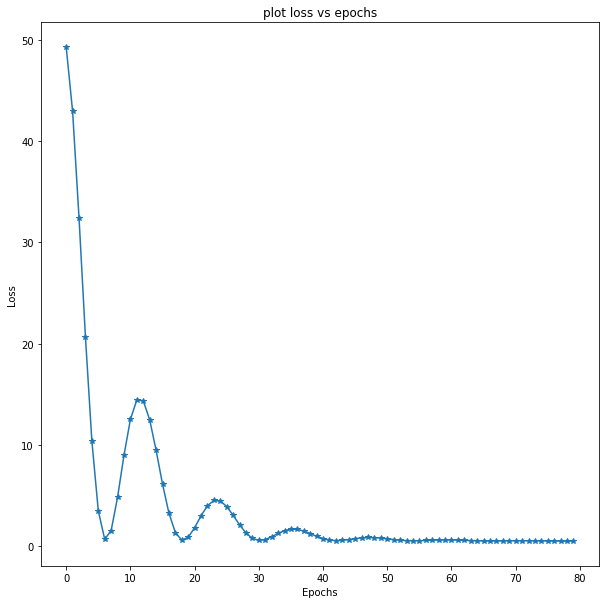

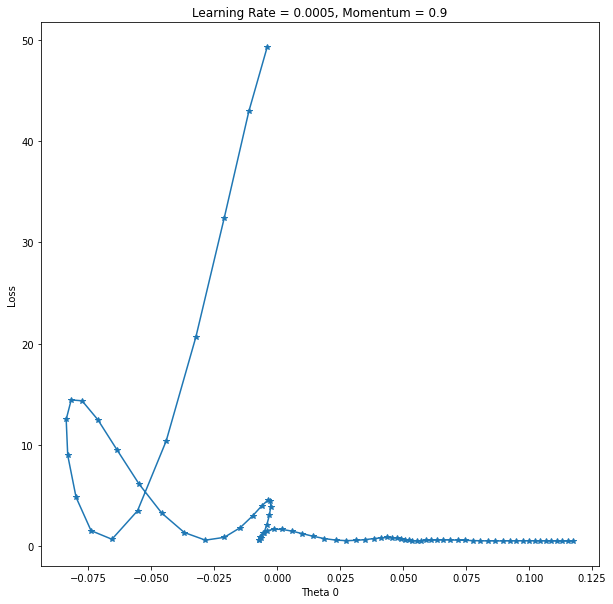

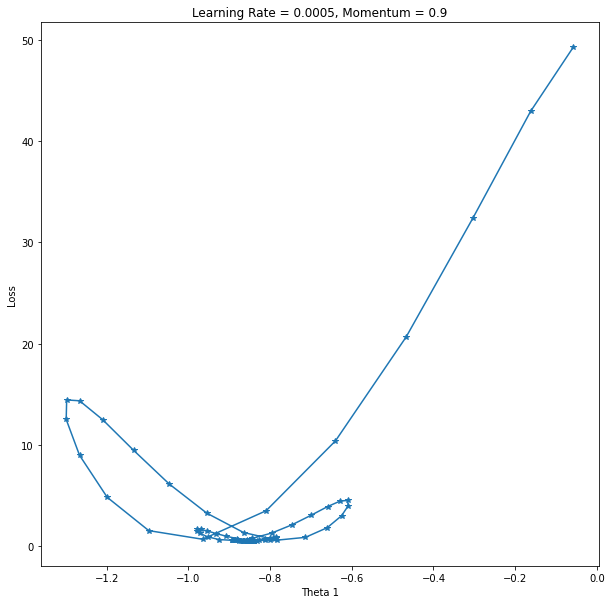

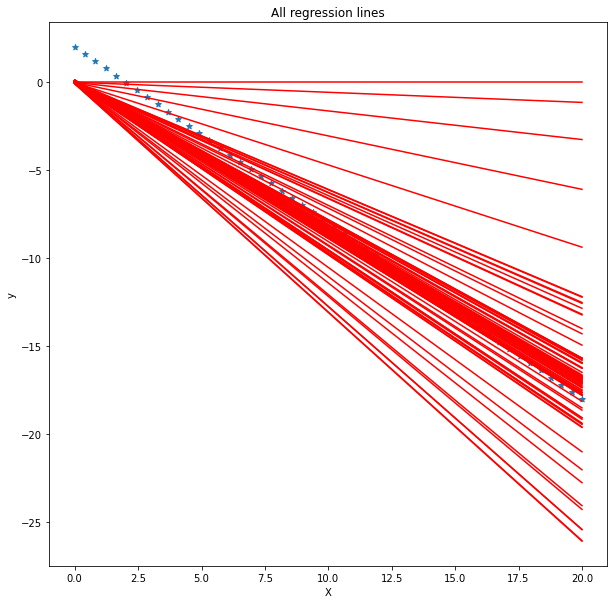

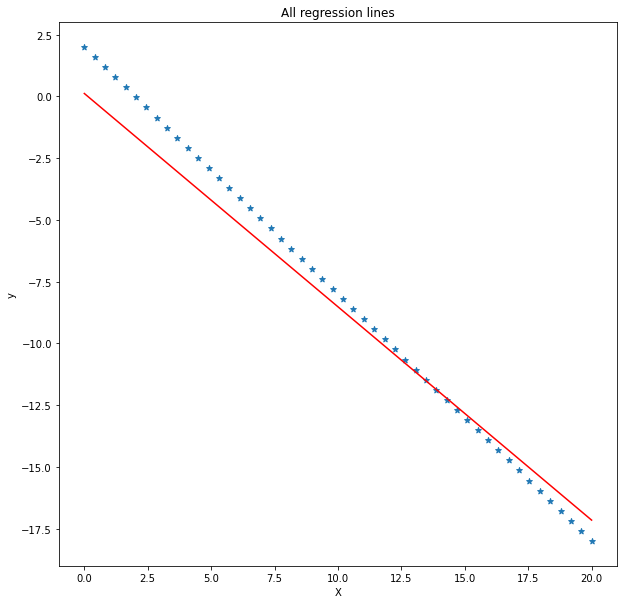

In [39]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, 0.9, h_s, X, y, (10,10))

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [40]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = momentum_GD(X, y, alpha=0.0005, momentum=0.89, iterations=300)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.004
theta_1_new : -0.05734693877

In [41]:
r2_score(y,h_s[-1])

0.972435565060376

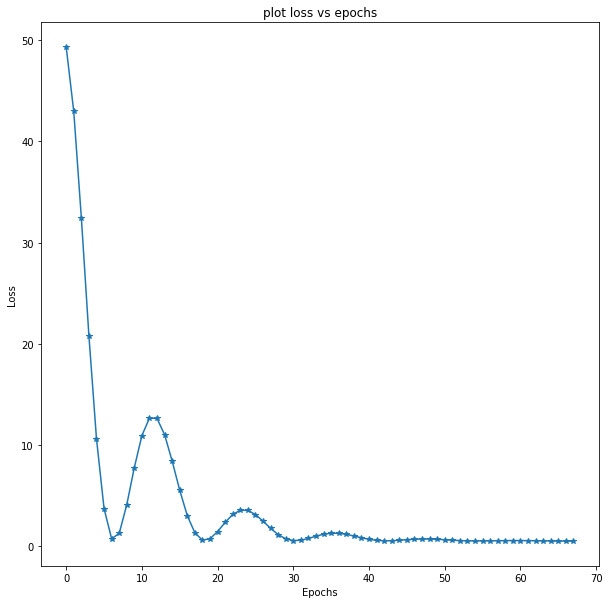

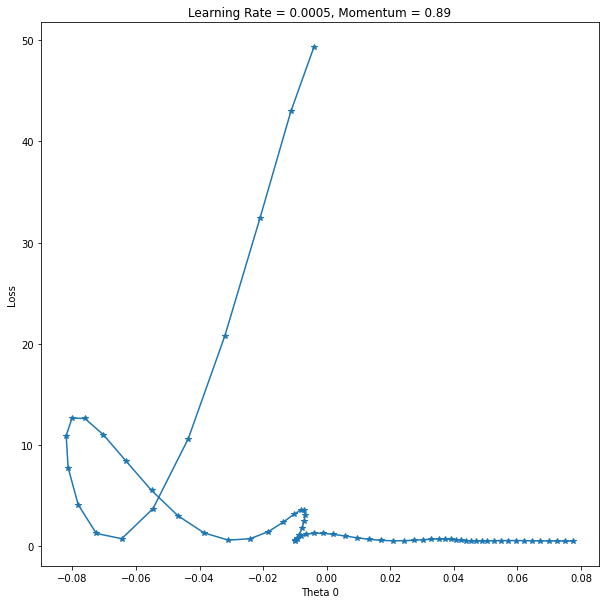

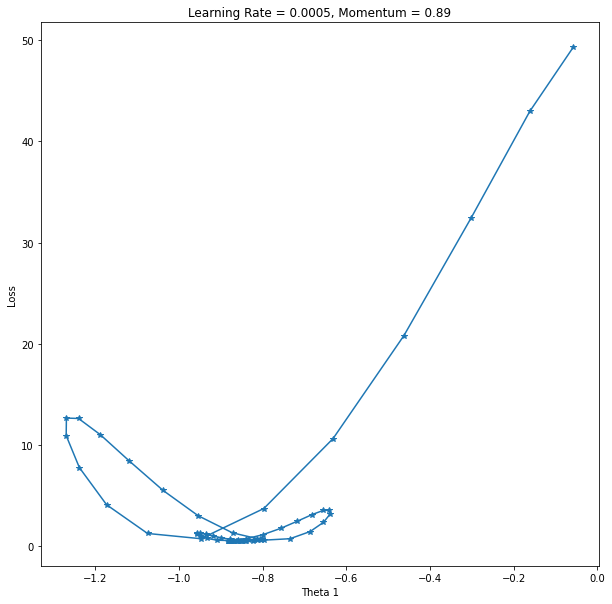

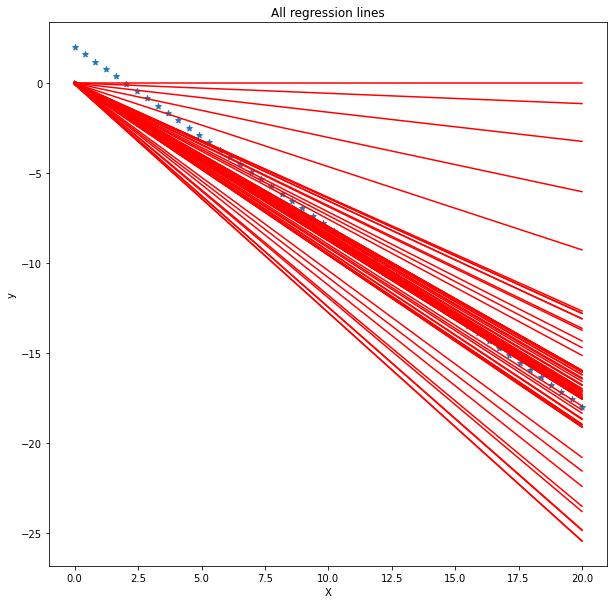

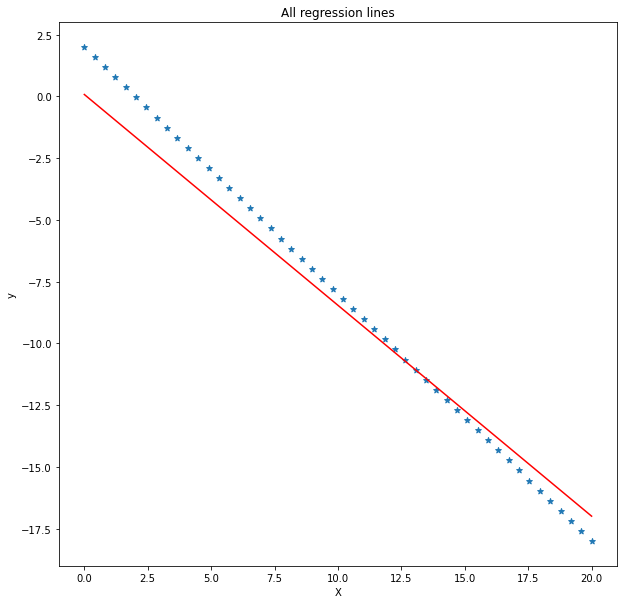

In [43]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, 0.89, h_s, X, y, (10,10))

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

Streaming output truncated to the last 5000 lines.
  -8.85559726  -9.10111222  -9.34662717  -9.59214213  -9.83765709
 -10.08317204 -10.328687   -10.57420195 -10.81971691 -11.06523186
 -11.31074682 -11.55626177 -11.80177673 -12.04729169 -12.29280664]

j = 25.98110172096275
Gradient Vector: 
[[ -6.27769023]
 [-83.64567352]]
Gradient Vector Norm: 83.88091614056204
theta_0_new : 1.7508996465597741
theta_1_new : -1.7344309133486557
****************** Iteration 130 ****************** 
h(x): [  1.75089965   1.04296866   0.33503768  -0.37289331  -1.08082429
  -1.78875528  -2.49668626  -3.20461725  -3.91254823  -4.62047922
  -5.3284102   -6.03634119  -6.74427217  -7.45220316  -8.16013414
  -8.86806513  -9.57599611 -10.2839271  -10.99185808 -11.69978907
 -12.40772005 -13.11565104 -13.82358202 -14.53151301 -15.23944399
 -15.94737498 -16.65530596 -17.36323695 -18.07116793 -18.77909892
 -19.4870299  -20.19496089 -20.90289187 -21.61082286 -22.31875384
 -23.02668483 -23.73461581 -24.4425468  -25.1504

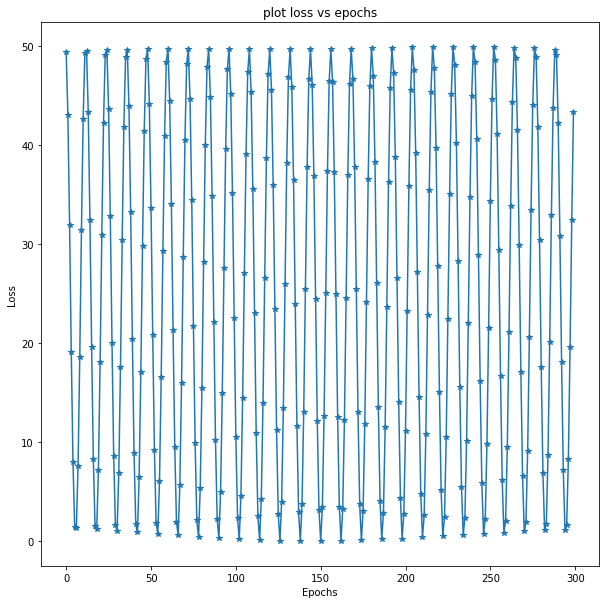

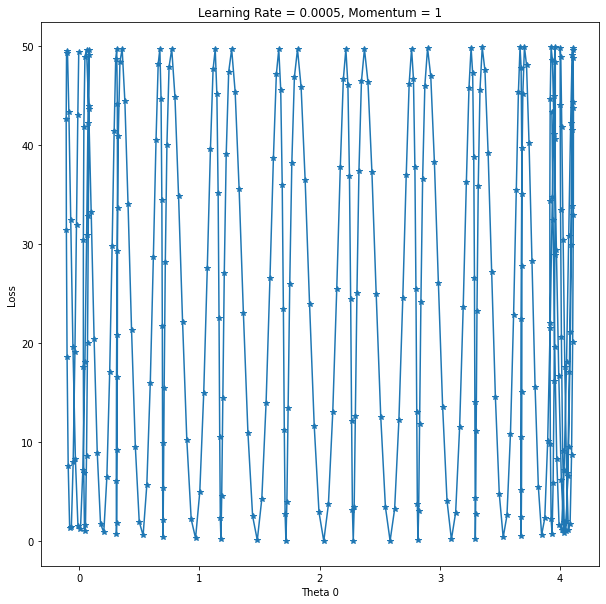

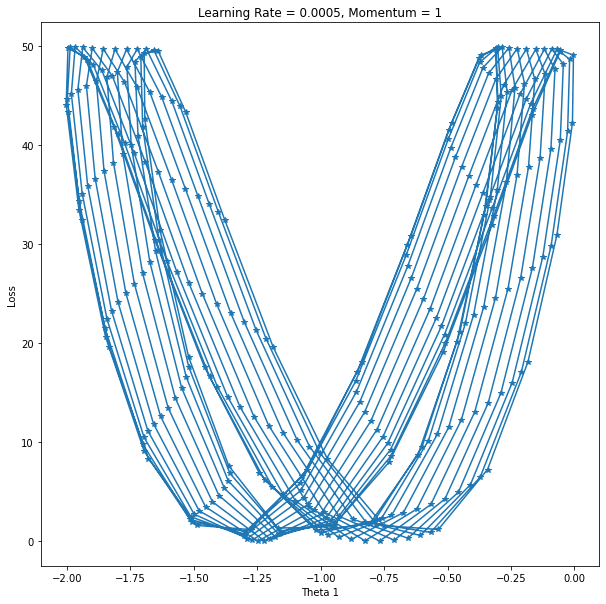

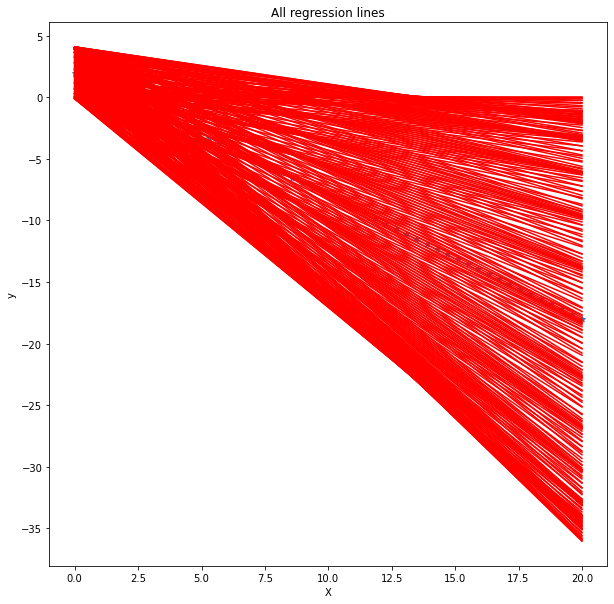

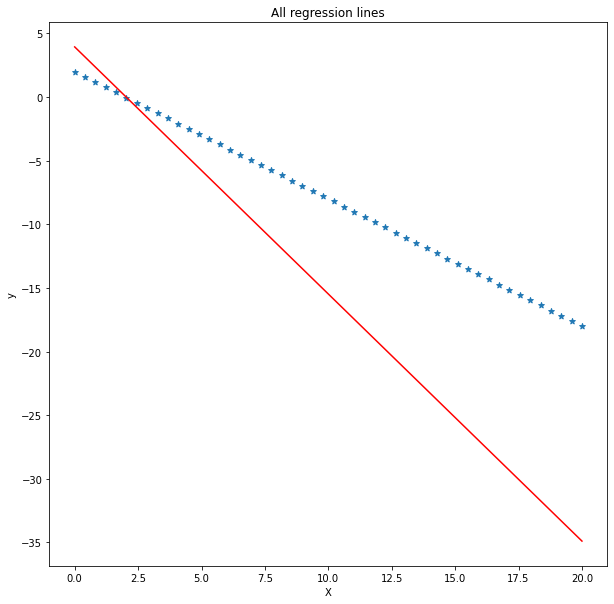

In [46]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = momentum_GD(X, y, alpha=0.0005, momentum=1, iterations=300)
print(r2_score(y,h_s[-1]))
plot_all(cost_vals, thetas0, thetas1, 0.0005, 1, h_s, X, y, (10,10))

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.004
theta_1_new : -0.05734693877

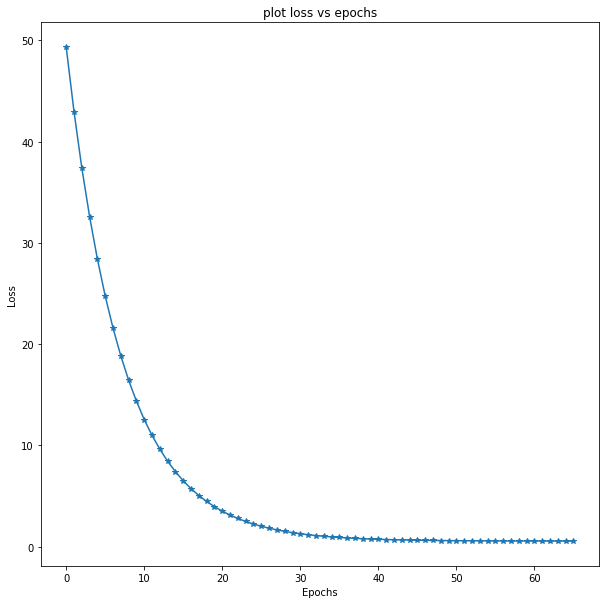

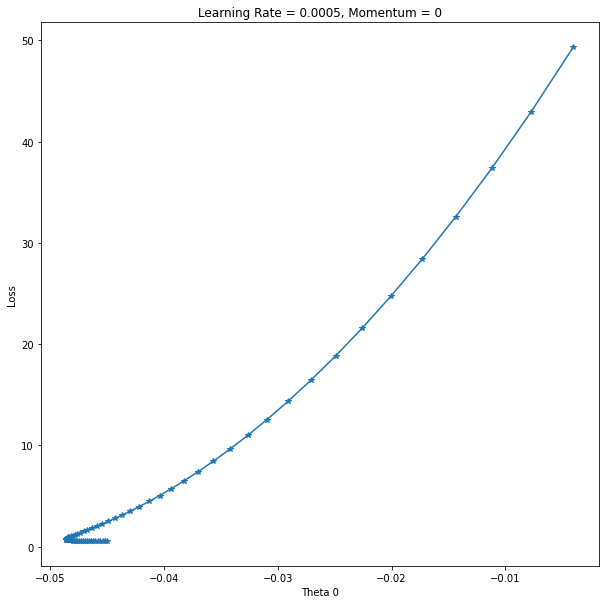

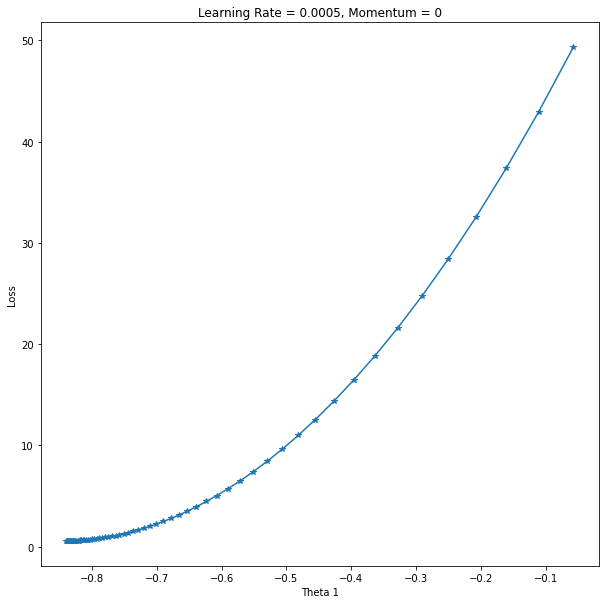

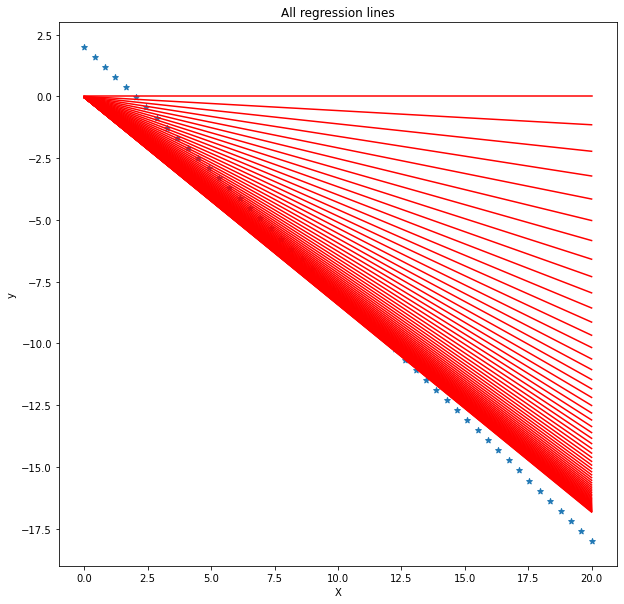

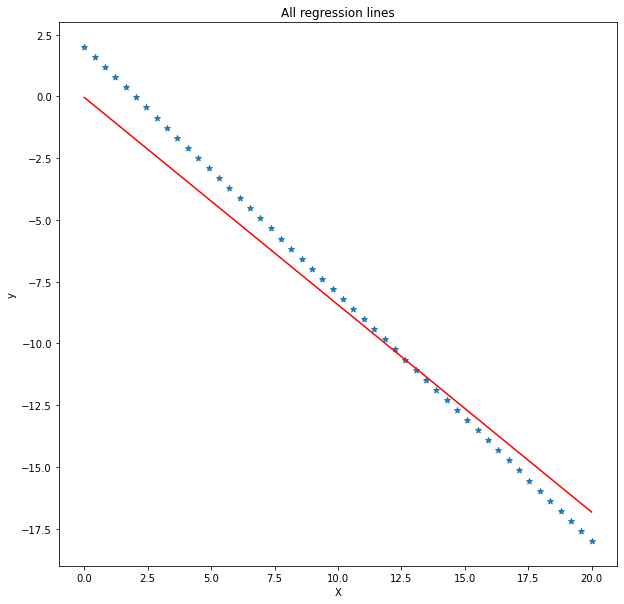

In [44]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = momentum_GD(X, y, alpha=0.0005, momentum=0, iterations=300)
print(r2_score(y,h_s[-1]))
plot_all(cost_vals, thetas0, thetas1, 0.0005, 0, h_s, X, y, (10,10))

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [56]:
def NAG(X, y, alpha, momentum, iterations):
  cost_vals = []
  h_s = []
  thetas0 = []
  thetas1 = []

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  theta_0_temp = 0
  theta_1_temp = 0
  vt_0 = 0
  vt_1 = 0
  i = 0
  grad = np.ones((2, 1))
  m = y.shape[0]

  while i < iterations and np.linalg.norm(grad, 2) > 0.001:
      print(f"****************** Iteration {i} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * X
      h_x_temp= theta_0_temp + theta_1_temp * X
      h_s.append(h_x)
      print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y
      error_temp = h_x_temp - y
      j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
      print(f'Error Vector: \n{error}')
      print(f'\nj = {j}')
      cost_vals.append(j)
      
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / m
      d_theta_1 = np.sum(error * X) / m

      d_theta_0_temp = np.sum(error_temp) / m
      d_theta_1_temp = np.sum(error_temp * X) / m
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      print(f"Gradient Vector: \n{grad}")
      print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      theta_0_temp = theta_0 - momentum * vt_0
      theta_1_temp = theta_1 - momentum * vt_1

      theta_0 = theta_0_temp - alpha * d_theta_0_temp
      theta_1 = theta_1_temp - alpha * d_theta_1_temp

      vt_0 = momentum * vt_0 + alpha * d_theta_0_temp
      vt_1 = momentum * vt_1 + alpha * d_theta_1_temp
      print(f'theta_0_new : {theta_0}')
      print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

      # Convergence check
      if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.001:
        break

      i += 1
    
  return theta_0, theta_1, cost_vals, h_s, thetas0, thetas1

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [57]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = momentum_GD(X, y, alpha=0.0005, momentum=0.9, iterations=300)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.004
theta_1_new : -0.05734693877

In [58]:
print(r2_score(y,h_s[-1]))

0.973589591111118


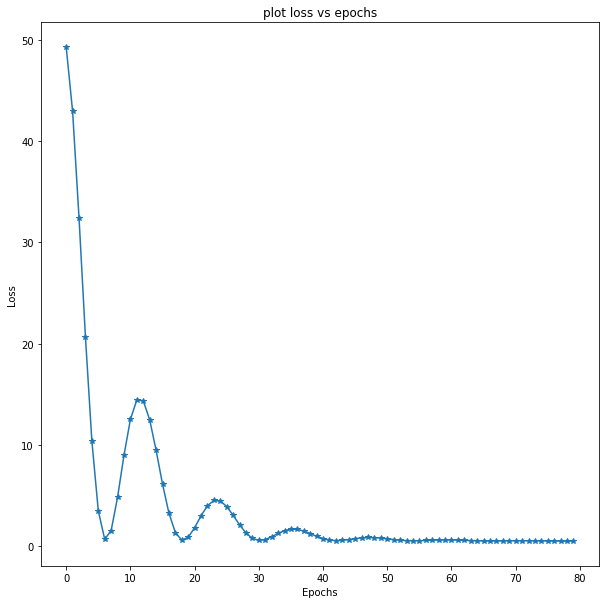

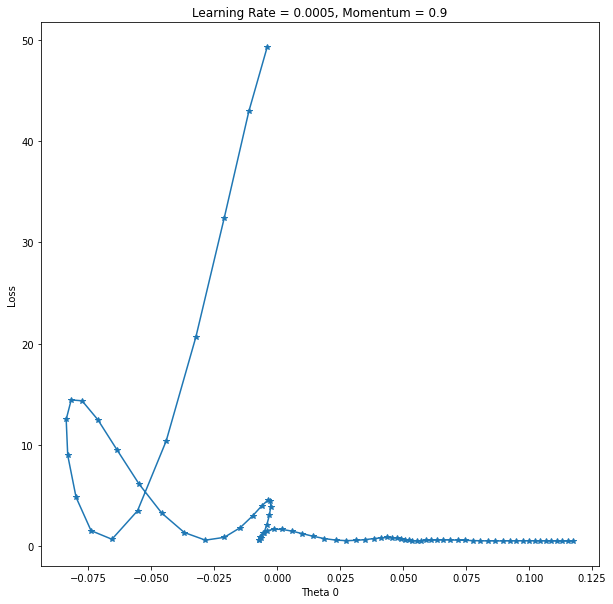

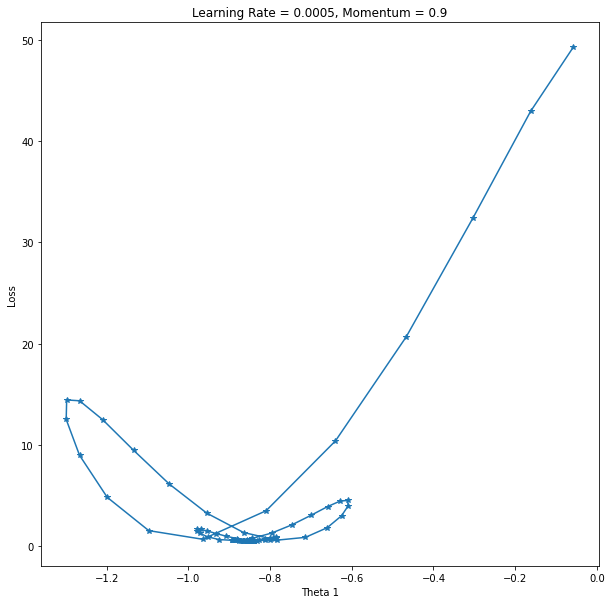

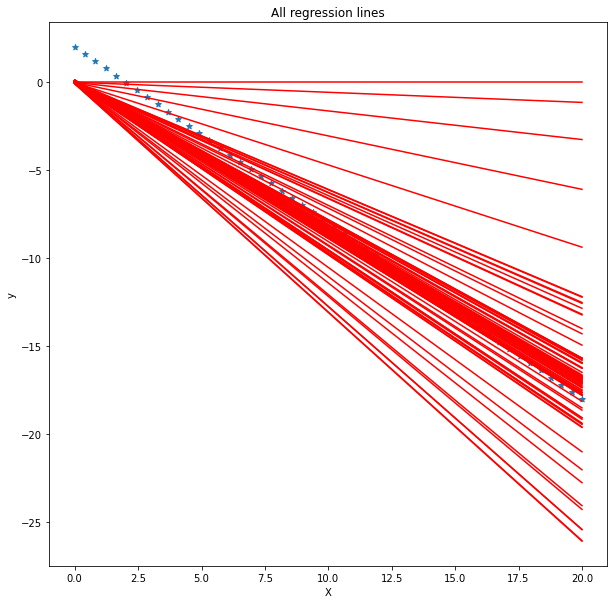

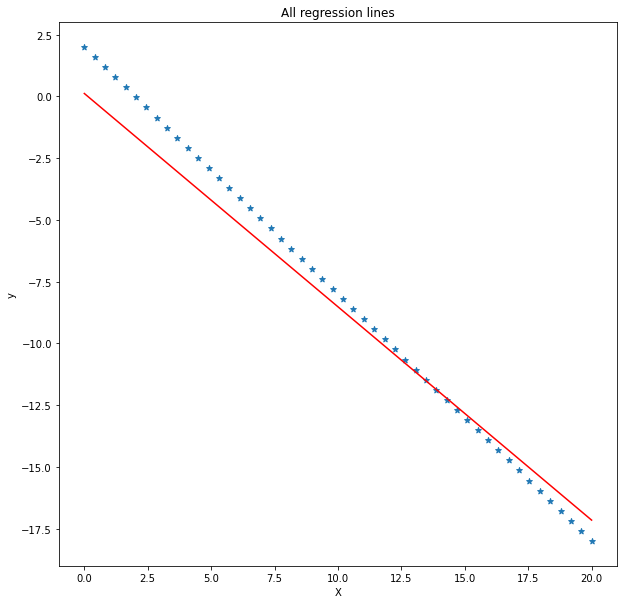

In [59]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, 0.9, h_s, X, y, (10,10))

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [60]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = momentum_GD(X, y, alpha=0.0005, momentum=0.89, iterations=300)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.004
theta_1_new : -0.05734693877

In [61]:
r2_score(y,h_s[-1])

0.972435565060376

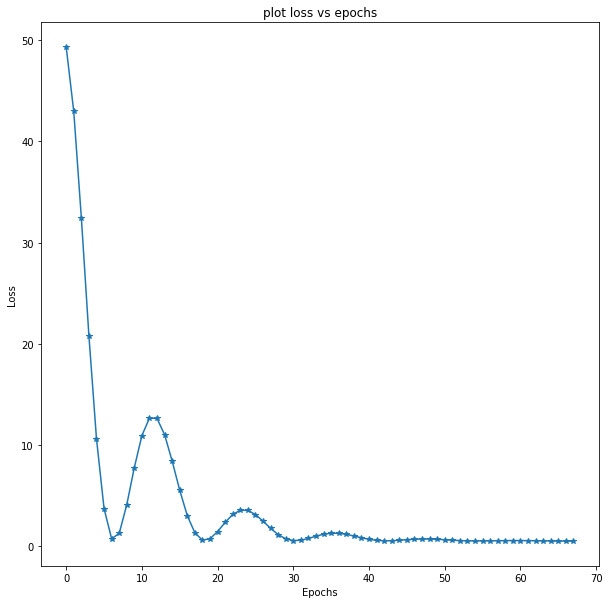

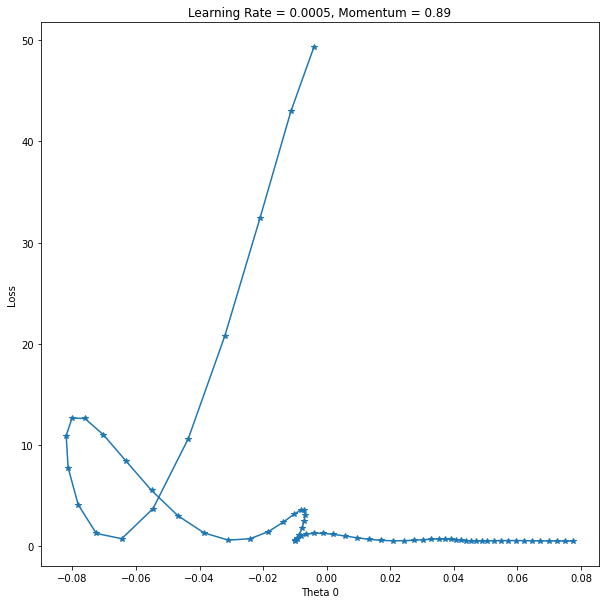

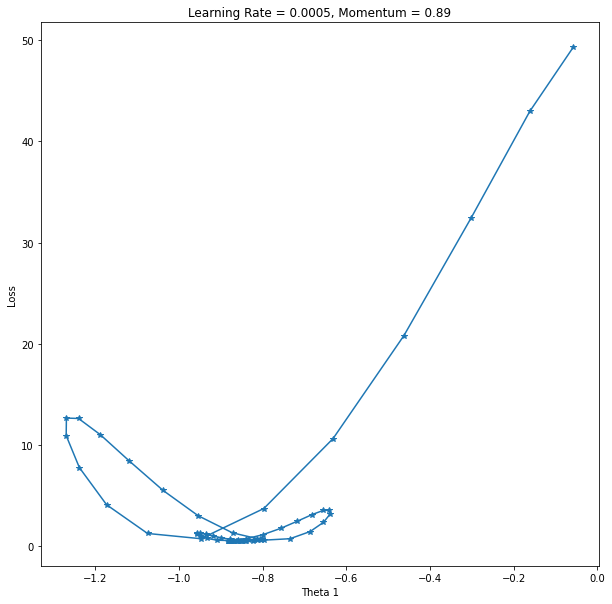

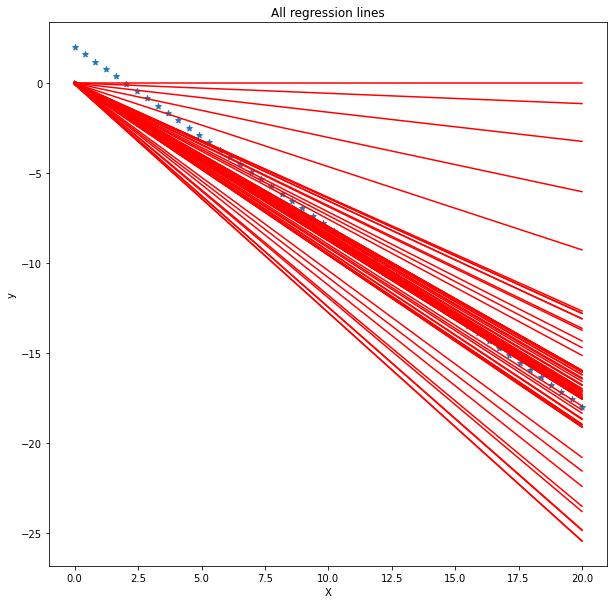

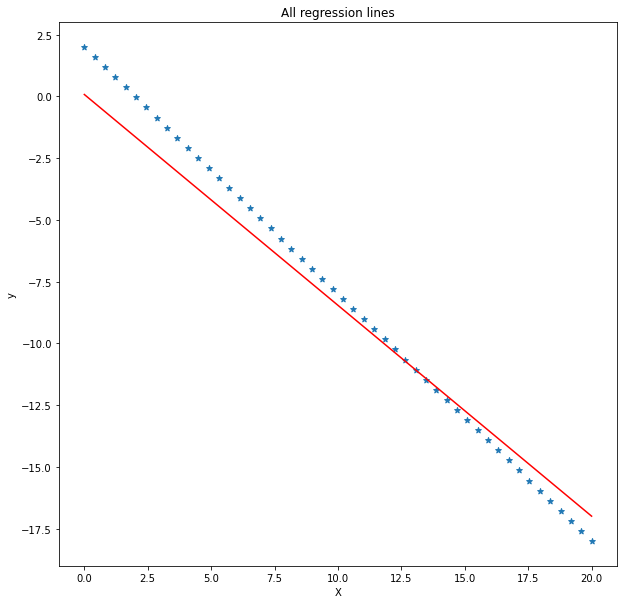

In [62]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, 0.89, h_s, X, y, (10,10))